# Step 1: Import helpful libraries

In [1]:
# Familiar imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.style.use('classic')
%matplotlib inline

# For ordinal encoding categorical variables, splitting data
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder, FunctionTransformer, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split

#To Pipeline the process 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# For training random forest model
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

#Grid Search
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from xgboost import cv
from xgboost import plot_importance
from sklearn.decomposition import PCA

import tensorflow as tf
import matplotlib as mpl
import xgboost as xgb

pd.set_option('max_columns', None)

In [2]:
#Python libraries and their versions used for this problem
print('Tensor Flow:',tf.__version__)
print('SciKit Learn:',sk.__version__)
print('Pandas:',pd.__version__)
print('Numpy:',np.__version__)
print('Seaborn:',sns.__version__)
print('MatPlot Library:', mpl.__version__)
print('XG Boost:',xgb.__version__)
#print('Yellow Brick:',yb.__version__)
#print('Pandas Profiling:', pp.__version__)


Tensor Flow: 2.4.1
SciKit Learn: 0.23.2
Pandas: 1.2.4
Numpy: 1.19.5
Seaborn: 0.11.1
MatPlot Library: 3.4.2
XG Boost: 1.4.2


# Step 2: Load the data

Next, we'll load the training and test data.  

We set `index_col=0` in the code cell below to use the `id` column to index the DataFrame.

In [3]:
# Load the training data
X_full = pd.read_csv("../input/30-days-of-ml/train.csv", index_col=0)
X_test_full = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)

# Preview the data
X_full.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
## Check for Data types & Missing data
X_full.info()
print('*' * 100)
X_full.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

No Null values in Data

In [5]:
X_full.describe(include='all')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
unique,2,2,2,4,4,4,8,8,7,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A,A,A,C,B,B,A,E,C,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,193130,154824,253886,263356,294737,149340,290511,276040,111103,71249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634


In [6]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_features  = [cname for cname in X_full.columns if
                    X_full[cname].nunique() <= 15 and 
                    X_full[cname].dtype == "object"]

# Select numerical columns
numeric_features  = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['int64', 'float64']
                 ]

# Keep selected columns only
my_features = categorical_features + numeric_features

#
print('categorical_features:', categorical_features)
print('numeric_features:', numeric_features)
print('my_features:', my_features)

#remove target column from Numeric features
numeric_features.remove('target')
print('numeric_features minus target column:', numeric_features)


categorical_features: ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
numeric_features: ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target']
my_features: ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target']
numeric_features minus target column: ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


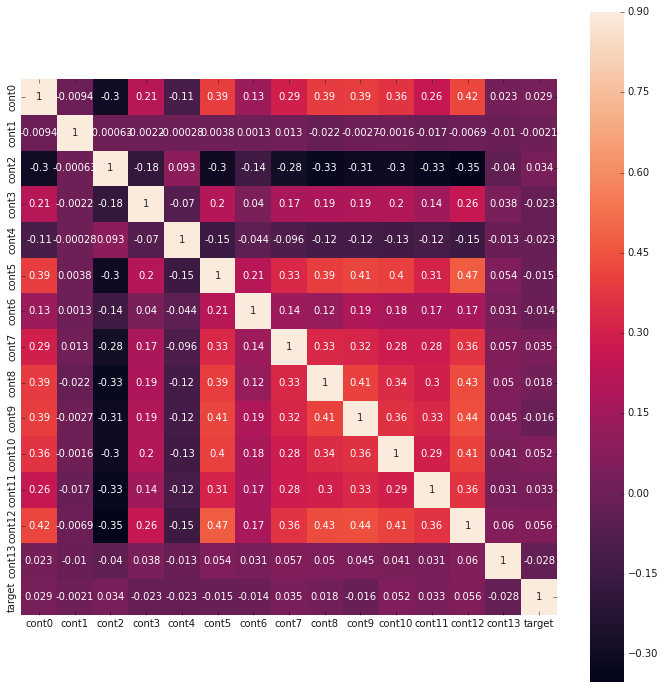

In [7]:
## Correlations
correlations = X_full[my_features].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlations, square=True, cbar=True, annot=True, vmax=.9);

array([[<AxesSubplot:title={'center':'cont0'}>,
        <AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>,
        <AxesSubplot:title={'center':'cont3'}>],
       [<AxesSubplot:title={'center':'cont4'}>,
        <AxesSubplot:title={'center':'cont5'}>,
        <AxesSubplot:title={'center':'cont6'}>,
        <AxesSubplot:title={'center':'cont7'}>],
       [<AxesSubplot:title={'center':'cont8'}>,
        <AxesSubplot:title={'center':'cont9'}>,
        <AxesSubplot:title={'center':'cont10'}>,
        <AxesSubplot:title={'center':'cont11'}>],
       [<AxesSubplot:title={'center':'cont12'}>,
        <AxesSubplot:title={'center':'cont13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

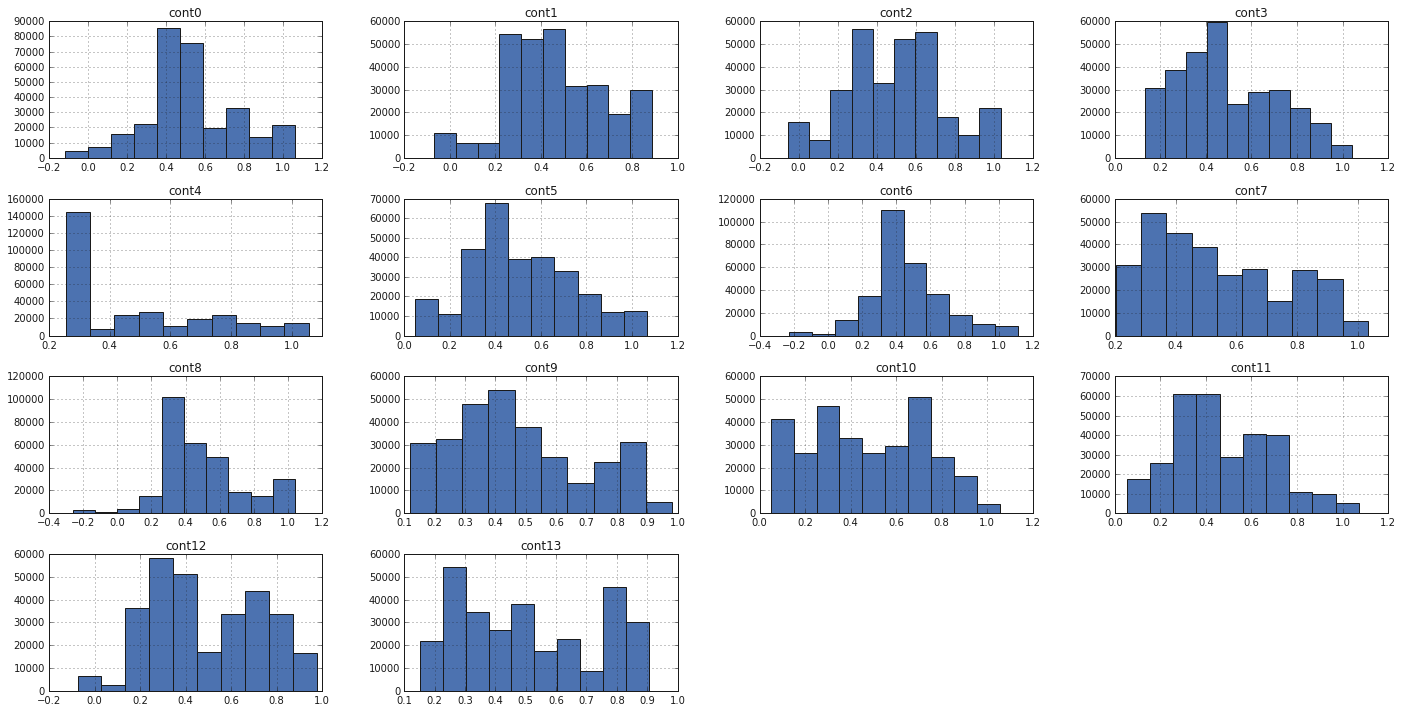

In [8]:
## Data Distribution of numeric features 
X_full[numeric_features].hist(figsize=(24,12))

array([[<AxesSubplot:title={'center':'cont0'}>,
        <AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>,
        <AxesSubplot:title={'center':'cont3'}>],
       [<AxesSubplot:title={'center':'cont4'}>,
        <AxesSubplot:title={'center':'cont5'}>,
        <AxesSubplot:title={'center':'cont6'}>,
        <AxesSubplot:title={'center':'cont7'}>],
       [<AxesSubplot:title={'center':'cont8'}>,
        <AxesSubplot:title={'center':'cont9'}>,
        <AxesSubplot:title={'center':'cont10'}>,
        <AxesSubplot:title={'center':'cont11'}>],
       [<AxesSubplot:title={'center':'cont12'}>,
        <AxesSubplot:title={'center':'cont13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

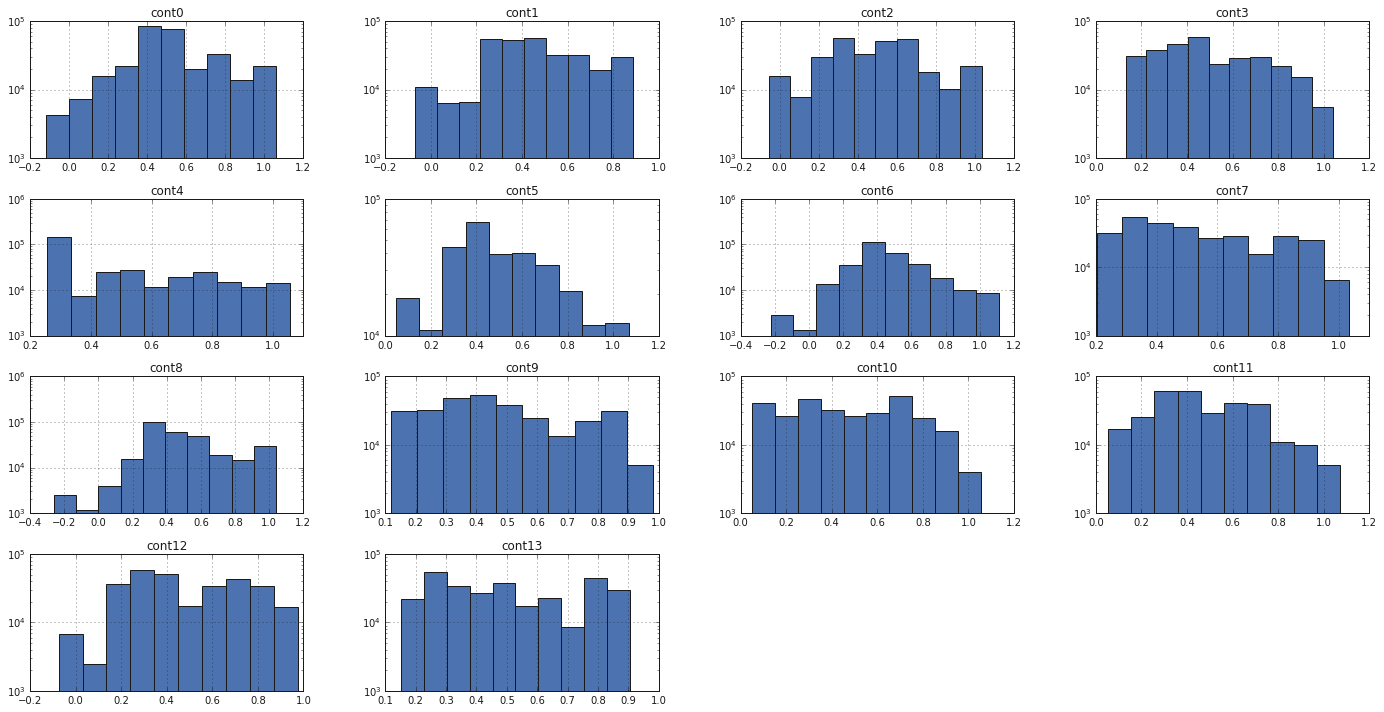

In [9]:
## Verify distribution with log transform 
X_full[numeric_features].hist(figsize=(24,12), log = True)

The above distribution looks good after log transformation

The next code cell separates the target (which we assign to `y`) from the training features (which we assign to `features`).

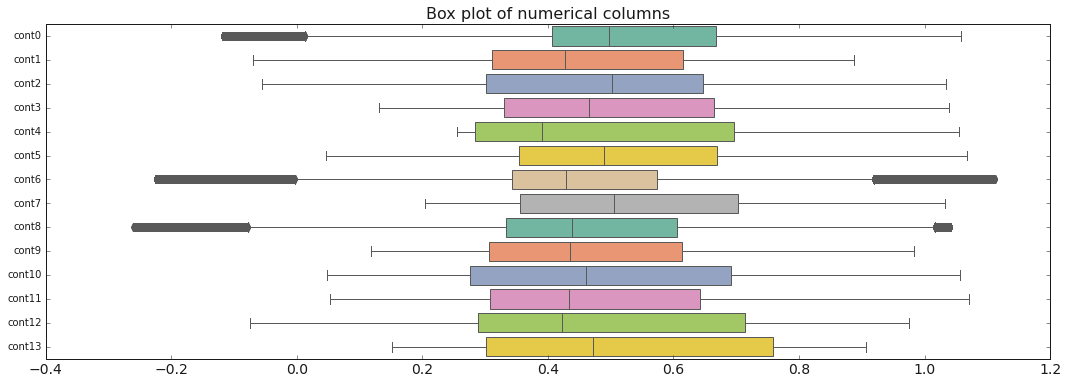

In [10]:
## Box Plot for Outliers
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=X_full[numeric_features], orient="h", palette="Set2");
plt.xticks(fontsize= 14)
plt.title('Box plot of numerical columns', fontsize=16);

Looks like few outliers in Cont0, Cont6, Cont8, target columns.
Lets check the ouliers in  target column now.

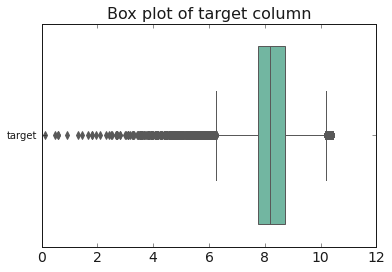

In [11]:
sns.boxplot(data=X_full[['target']], orient="h", palette="Set2" );
plt.xticks(fontsize= 14)
plt.title('Box plot of target column', fontsize=16);

# Step 3: Prepare the data



In [12]:
# Deal with Outliers

from scipy import stats


def treatoutliers(df=None, columns=None, factor=1.5, method='IQR', treatment='cap'):

    for column in columns:
        if method == 'STD':
            permissable_std = factor * df[column].std()
            col_mean = df[column].mean()
            floor, ceil = col_mean - permissable_std, col_mean + permissable_std
        elif method == 'IQR':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            floor, ceil = Q1 - factor * IQR, Q3 + factor * IQR
#         print(floor, ceil)
        if treatment == 'remove':
            print(treatment, column)
            df = df[(df[column] >= floor) & (df[column] <= ceil)]
        elif treatment == 'cap':
            print(treatment, column)
            df[column] = df[column].clip(floor, ceil)

    return df
    
#remove outliere from target column 
#for colName in [['target']]:
    #X_full = treatoutliers(df=X_full,columns=colName, treatment='remove')         
    
#Quantile-based Flooring and Capping
for colName in [['target','cont0','cont6','cont8']]:
    X_full = treatoutliers(df=X_full,columns=colName, treatment='cap')      
    
X_full.info()



cap target
cap cont0
cap cont6
cap cont8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10 

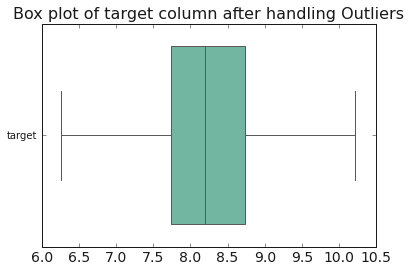

In [13]:
sns.boxplot(data=X_full[['target']], orient="h", palette="Set2" );
plt.xticks(fontsize= 14)
plt.title('Box plot of target column after handling Outliers', fontsize=16);

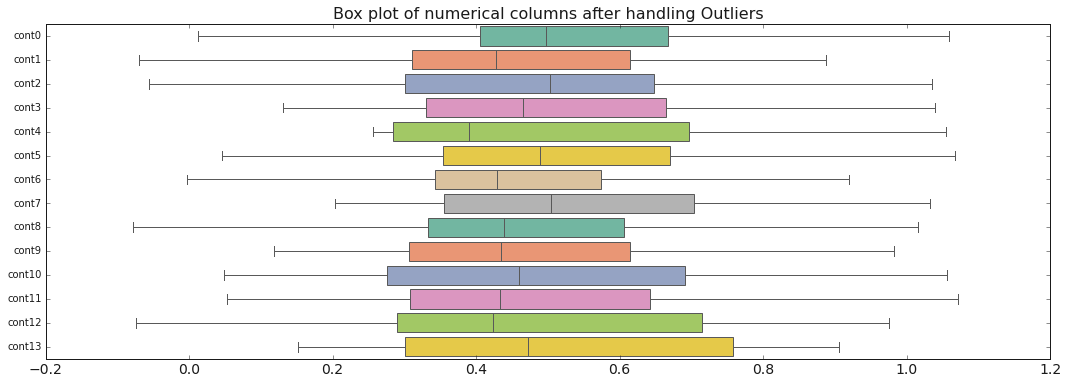

In [14]:
## Box Plot for Outliers
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=X_full[numeric_features], orient="h", palette="Set2");
plt.xticks(fontsize= 14)
plt.title('Box plot of numerical columns after handling Outliers', fontsize=16);

In [15]:
# Deal with missing data
## No Misisng data in this dataset :)

In [16]:
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['target'], inplace=True)
y = X_full['target']
X_full.drop(['target'], axis=1, inplace=True)

# Preview features
X_full.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [17]:
# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.9, test_size=0.1,
                                                                random_state=0)

In [18]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_features  = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() <= 15 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numeric_features  = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']
                 ]

# Keep selected columns only
my_features = categorical_features + numeric_features

#
print('categorical_features', categorical_features)
print('numeric_features', numeric_features)
print('my_features', my_features)

categorical_features ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
numeric_features ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
my_features ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


In [19]:
X_train = X_train_full[my_features]
X_valid = X_valid_full[my_features]
X_test = X_test_full[my_features]

In [20]:
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,,
460905,A,B,A,C,B,C,B,E,E,F,0.915149,0.253177,0.194075,0.596032,0.889253,0.494761,0.613863,0.708834,0.548014,0.321308,0.286040,0.663483,0.423789,0.264511
495259,B,A,B,C,B,A,A,E,C,F,0.679607,0.304675,0.441560,0.236838,0.896394,0.674308,0.393346,0.617894,0.418062,0.597744,0.736224,0.584338,0.273255,0.260882
428788,A,B,B,C,B,B,A,E,E,K,0.497694,0.307117,0.758843,0.266861,0.458592,0.247413,0.179286,0.501181,0.274230,0.389499,0.365823,0.625327,0.657805,0.464079
446524,A,B,B,C,B,B,A,E,A,A,0.406765,0.758756,0.650261,0.419673,0.513907,0.588984,0.359562,0.380042,0.703066,0.378986,0.287778,0.380397,0.529498,0.274086
51736,A,B,A,C,B,B,A,E,C,I,0.276012,0.356630,0.925683,0.557529,0.277507,0.047176,0.508692,0.304767,0.262476,0.287057,0.447125,0.294946,0.307148,0.816095


In [21]:
X_train.describe(include='all')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,270000,270000,270000,270000,270000,270000,270000,270000,270000,270000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000
unique,2,2,2,4,4,4,8,8,7,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A,A,A,C,B,B,A,E,C,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,173879,139263,228545,236977,265239,134439,261433,248397,100021,64180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.528538,0.460670,0.490693,0.496443,0.491622,0.510413,0.465446,0.536897,0.499191,0.474819,0.474486,0.473110,0.494467,0.508146
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227334,0.214003,0.253453,0.219245,0.240143,0.228217,0.196136,0.218068,0.235723,0.217919,0.255961,0.222043,0.247336,0.222997
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012823,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.002891,0.203763,-0.077869,0.117896,0.048732,0.052615,-0.074208,0.151050
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.406014,0.310480,0.300603,0.329460,0.284187,0.354169,0.342891,0.355652,0.332601,0.306910,0.276009,0.308113,0.289023,0.300527
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496854,0.427799,0.502672,0.464899,0.390068,0.488619,0.429361,0.504319,0.439182,0.434451,0.459978,0.433793,0.422915,0.472391
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667710,0.614986,0.647769,0.664075,0.696644,0.669427,0.573292,0.703236,0.605984,0.613741,0.691564,0.641934,0.714388,0.758438


In [22]:
X_train.shape


(270000, 24)

# Step 4: Train a model

Now that the data is prepared, the next step is to train a model.  

Lets fit a XG Boost Regression model to the data.

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [24]:
%%time

#random seed
rans = 42

def log_transform(x):
    return np.log(x + 1)


transformer = FunctionTransformer(log_transform)


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
       #,('transformer', transformer)
       ,('RobustScaler', RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True))  
       ,('scaler', StandardScaler())
      # ,('scaler', MinMaxScaler())
      #,('normalizer',  Normalizer())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant'))
    ('imputer', SimpleImputer(strategy='most_frequent')) 
    ,('onehot', OneHotEncoder(handle_unknown='ignore'))
    #,('scaler', OrdinalEncoder())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
  )


CPU times: user 629 µs, sys: 0 ns, total: 629 µs
Wall time: 639 µs


In [25]:
# Define the model Parameters, can be optimized using either Optuna or Grid Search CV

#xgb_params = {'n_estimators': 4693, 'max_depth': 8, 'learning_rate': 0.007701251349251828, 'gamma': 0.7000000000000001, 'min_child_weight': 1,  'subsample': 0.7, 'colsample_bytree': 0.6, 'reg_alpha': 0.6000000000000001, 'reg_lambda': 0.7000000000000001,'random_state':rans}
#RMSE: 0.7104688698408458

#xgb_params = {'n_estimators': 4575, 'max_depth': 3, 'learning_rate': 0.03928410410450762, 'gamma': 0.30000000000000004, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.6, 'reg_alpha': 0.2, 'reg_lambda': 0.5}
#RMSE: 0.7097159074299819

#xgb_params = {'n_estimators': 4057, 'max_depth': 9, 'learning_rate': 0.003966747569044319, 'gamma': 0.7000000000000001, 'min_child_weight': 3, 'subsample': 0.6, 'colsample_bytree': 0.7, 'reg_alpha': 0.9, 'reg_lambda': 0.4}
#RMSE: 0.7116278190334827

#xgb_params = {'n_estimators': 4831, 'max_depth': 9, 'learning_rate': 0.008052341006810907, 'gamma': 0.8, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 1.0, 'reg_alpha': 0.4, 'reg_lambda': 0.7000000000000001}
# RMSE: 0.7118598248705319 1H:24 MINS RUN TIME


#xgb_params = {'n_estimators': 10000, 'max_depth': 3, 'learning_rate': 0.03628302216953097, 'subsample': 0.7875490025178415, 'colsample_bytree': 0.11807135201147481,  'booster': 'gbtree',  'reg_lambda': 0.0008746338866473539, 'reg_alpha': 23.13181079976304, 'n_jobs':-1, 'random_state':rans}
#RMSE: 0.7087975222950087

#xgb_params = {'n_estimators': 5000, 'learning_rate': 0.07853392035787837, 'reg_lambda': 1.7549293092194938e-05, 'reg_alpha': 14.68267919457715,'subsample': 0.8031450486786944, 'colsample_bytree': 0.170759104940733,  'max_depth': 3} 
#RMSE: 0.7095121175933053 ***

#xgb_params = { 'n_estimators': 5000, 'learning_rate': 0.12,  'subsample': 0.96,  'colsample_bytree': 0.12, 'max_depth': 2, 'booster': 'gbtree',  'reg_lambda': 65.1, 'reg_alpha': 15.9, 'random_state':rans }
# RMSE: 0.7091475688922307

#xgb_params = {'n_estimators': 1799, 'max_depth': 3, 'learning_rate': 0.06221341800055895, 'gamma': 0.4, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.6, 'reg_alpha': 0.2, 'reg_lambda': 0.0}
#RMSE: 0.710921715330132

#xgb_params = {'n_estimators': 10000, 'max_depth': 3, 'learning_rate': 0.03928410410450762, 'gamma': 0.30000000000000004, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.6, 'reg_alpha': 0.2, 'reg_lambda': 0.5}
#RMSE: 0.7103632778630045

#xgb_params = {'n_estimators': 5000, 'max_depth': 3, 'learning_rate': 0.04, 'gamma': 0.3, 'min_child_weight': 6, 'subsample': 0.9, 'colsample_bytree': 0.12, 'reg_alpha': 36.04, 'reg_lambda': 1.22, 'random_state':rans}
#RMSE: 0.7085797087439527 ****

#xgb_params = {'n_estimators': 3005, 'max_depth': 9, 'learning_rate': 0.001, 'gamma': 1.0, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.5, 'reg_alpha': 1.0, 'reg_lambda': 0.0, 'random_state':rans}
#

#xgb_params = { 'n_estimators': 5000, 'max_depth': 2, 'learning_rate': 0.12,  'subsample': 0.96,  'colsample_bytree': 0.12, 'reg_alpha': 15.9, 'reg_lambda': 65.1,  'booster': 'gbtree', 'random_state':rans }


#xgb_params =  {'n_estimators': 3006, 'max_depth': 4, 'learning_rate': 0.026, 'gamma': 1.0, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.8, 'reg_lambda': 0.2, 'random_state':rans}
#RMSE: 0.7104112427933705

xgb_params =  {'n_estimators': 2217, 'max_depth': 4, 'learning_rate': 0.054, 'gamma': 1.0, 'min_child_weight': 5, 'subsample': 0.8, 'colsample_bytree': 0.6, 'reg_alpha': 0.9, 'reg_lambda': 0.2, 'random_state':rans}
model = XGBRegressor(**xgb_params) 

# model = Ridge(alpha=0.05, normalize=True) #  RMSE: 0.7410128061594929
# model = Lasso(alpha=0.5, normalize=True)  # RMSE: 0.747933770739031
# model = LinearRegression(normalize=True)  # RMSE: 0.7410032228563359
# model = DecisionTreeRegressor(max_depth=3) #RMSE: 0.7429294772568634
# model = RandomForestRegressor(n_estimators=50, random_state=rans, max_depth=3) #RMSE: 0.7421769885950228
# model = XGBRegressor(n_estimators=500, learning_rate=0.35, n_jobs=-1, random_state=rans, eval_metric ='rmse', objective ='reg:squarederror', booster='gblinear') 
# RMSE: 0.748752632103789
# model = BaggingRegressor(RandomForestRegressor(n_estimators=50, random_state=rans, max_depth=3), n_estimators=2, random_state=rans, max_samples=0.8, max_features=0.7, bootstrap=True, bootstrap_features=True, n_jobs=-1)  
# RMSE: 0.742235730626387
# model = MLPRegressor(activation='tanh', hidden_layer_sizes= (100,3) ,learning_rate='adaptive', solver='adam', max_iter=1000)
# RMSE: 0.7342802036691075


####### Using Neural Networks (regression)

####### Import the kera modules 
from keras.layers import Input, Dense
from keras.models import Model

####### This returns a tensor. Since the input has 54 columns after preprocessing
inputs = Input(shape=(54))

####### a layer instance is callable on a tensor, and returns a tensor
####### To the first layer we are feeding inputs
x = Dense(32, activation='relu')(inputs)
####### To the next layer we are feeding the result of previous call here it is h
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
####### Predictions are the result of the neural network. Notice that the predictions are also having one column.
predictions = Dense(1)(x)

####### This creates a model that includes
####### the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mse'])

X_train_tf = preprocessor.fit_transform(X_train)
model.fit(X_train_tf, y_train,  epochs=10, batch_size=10000)

### Other models tried !!! 
* model = SVR(kernel='linear', C=1.0) running for ever...
* model = Ridge(alpha=0.05, normalize=True) #  RMSE: 0.7410128061594929
* model = Lasso(alpha=0.5, normalize=True)  # RMSE: 0.747933770739031
* model = LinearRegression(normalize=True)  # RMSE: 0.7410032228563359
* model = DecisionTreeRegressor(max_depth=3) #RMSE: 0.7429294772568634
* model = RandomForestRegressor(n_estimators=50, random_state=rans, max_depth=3) #RMSE: 0.7421769885950228
* model = XGBRegressor(n_estimators=500, learning_rate=0.35, n_jobs=-1, random_state=rans, eval_metric ='rmse', objective ='reg:squarederror', booster='gblinear') # RMSE: 0.748752632103789
* model = BaggingRegressor(RandomForestRegressor(n_estimators=50, random_state=rans, max_depth=3), n_estimators=2, random_state=rans, max_samples=0.8, max_features=0.7, bootstrap=True, bootstrap_features=True, n_jobs=-1)  RMSE: 0.742235730626387



In [26]:
%%time
#used for all models except for NN

#pca = PCA(n_components=20)
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      #('pca',pca),
                      ('model', model)
                     ])

final_model = clf.fit(X_train, y_train)    
preds_valid = final_model.predict(X_valid)


#used for Neural Networks (regression)
#X_valid_tf = preprocessor.fit_transform(X_valid)
#preds_valid = model.predict(X_valid_tf)

#print MAE, RMSE
#print('MAE:',mean_absolute_error(y_valid, preds_valid))
print('RMSE:',mean_squared_error(y_valid, preds_valid, squared=False))


    

RMSE: 0.7101777969847634
CPU times: user 45min 52s, sys: 2.11 s, total: 45min 54s
Wall time: 11min 54s


In [27]:
result_df=pd.DataFrame({'Actual':y_valid, 'Predicted':preds_valid, 'Diff':preds_valid-y_valid})  
result_df['Diff'].round().value_counts()

 0.0    15488
 1.0     7423
-1.0     6033
-2.0      968
 2.0       88
Name: Diff, dtype: int64

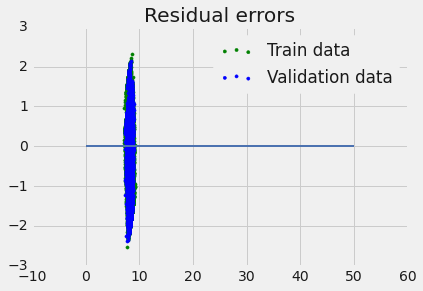

In [28]:
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(final_model.predict(X_train), final_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in Validation data
plt.scatter(preds_valid, preds_valid-y_valid,
            color = "blue", s = 10, label = 'Validation data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [29]:
final_model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('RobustScaler',
                                                                   RobustScaler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
    

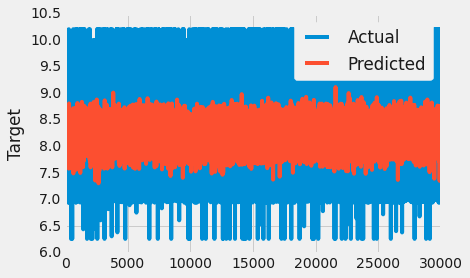

In [30]:
#Compare results
plt.plot(y_valid.values, label='Actual')
plt.plot(preds_valid, label='Predicted')
plt.ylabel('Target')

plt.legend()
plt.show()

We set `squared=False` to get the root mean squared error (RMSE) on the validation data.

########## Experiments with Hyperparameters

Run1:
#####n_estimators=100
#MAE: 0.5788446722936859
#RMSE: 0.7320833872186358

Run2:
#n_estimators=200
#MAE: 0.5763720833263785
#RMSE: 0.7264852171503737

Run3:
#n_estimators=300, leanring rate 0.01 (3 mins)
#MAE: 0.6490355840206453
#RMSE: 0.825432403656066

Run4:
#n_estimators=300, leanring rate 0.04 (3 mins)
#MAE: 0.5757358523789009
#RMSE: 0.7255126154801023

Run5:
#n_estimators=400 (4 mins)
#MAE: 0.5746261034859939
#RMSE: 0.7235933507493129

Run6:
#n_estimators=500 (5 mins)
#MAE: 0.5743067834045243
#RMSE: 0.7230632617875121

Run7:
Model: {'model__n_estimators': 300, 'model__n_jobs': -1, 'pca__n_components': 15}
MAE: 0.5934883835007666
RMSE: 0.7493943243885948
CPU times: user 10min 15s, sys: 5.28 s, total: 10min 21s
Wall time: 17min 49s

Run8 (with PCA(15)):
MAE: 0.5927382290665306
RMSE: 0.7485816554777529
CPU times: user 9min 37s, sys: 4.83 s, total: 9min 42s
Wall time: 2min 30s

Run9: 
MAE: 0.5728425760671754
RMSE: 0.720071649254918
CPU times: user 10min 50s, sys: 1.11 s, total: 10min 51s
Wall time: 2min 47s

xgb_params = {'n_estimators': 500,
              'learning_rate': 0.35,
              #'subsample': 0.926,
              #'colsample_bytree': 0.84,
              'max_depth': 3,
              'booster': 'gbtree', 
              'reg_lambda': 35.1,
              'reg_alpha': 34.9,
              'random_state': 1,
              'n_jobs': -1}
              
Run 10:
MAE: 0.5741494144522038
RMSE: 0.7217184082612594
CPU times: user 13min 46s, sys: 767 ms, total: 13min 46s
Wall time: 3min 32s

xgb_params = {'n_estimators': 500,
              'learning_rate': 0.35,
              #'subsample': 0.926,
              #'colsample_bytree': 0.84,
              'max_depth': 3,
              'booster': 'gbtree', 
              'reg_lambda': 35.1,
              'reg_alpha': 34.9,
              'random_state': 1,
              'n_jobs': -1}

Run 11:
MAE: 0.5727879704431276
RMSE: 0.7213516248591221
CPU times: user 37min 36s, sys: 2.4 s, total: 37min 39s
Wall time: 10min 5s

xgb_params = {'n_estimators': 3554, 
              'max_depth': 4, 
              'learning_rate': 0.027578828101534045, 
              'gamma': 0.4, 
              'min_child_weight': 7, 
              'subsample': 0.6, 
              'colsample_bytree': 0.5, 
              'reg_alpha': 0.30000000000000004, 
              'reg_lambda': 0.5,
              'random_state': rans}
              
Run 12: [Best So far]              
MAE: 0.5728816482856
RMSE: 0.721283792313526
CPU times: user 1h 8min 24s, sys: 3.27 s, total: 1h 8min 27s
Wall time: 17min 25s

xgb_params = {'n_estimators': 4417, 
             'max_depth': 3, 
             'learning_rate': 0.03573176446521596, 
             'gamma': 0.5, 
             'min_child_weight': 7, 
             'subsample': 0.8, 
             'colsample_bytree': 0.7, 
             'reg_alpha': 0.1, 
             'reg_lambda': 0.4,
              'random_state': rans}
              
Run 13: 
MAE: 0.5727410560712486
RMSE: 0.7210744841747833
CPU times: user 1h 3min 50s, sys: 2.84 s, total: 1h 3min 53s
Wall time: 16min 15s

xgb_params = {'n_estimators': 4575, 'max_depth': 3, 'learning_rate': 0.03928410410450762, 
              'gamma': 0.30000000000000004, 'min_child_weight': 3, 
              'subsample': 0.8, 'colsample_bytree': 0.6, 'reg_alpha': 0.2, 'reg_lambda': 0.5}
              
Run 14 (cap all outliers):
MAE: 0.569499593862888
RMSE: 0.70940318535282
CPU times: user 28min 34s, sys: 1.39 s, total: 28min 35s
Wall time: 7min 18s

xgb_params = {'n_estimators': 5000, 'learning_rate': 0.07853392035787837, 'reg_lambda': 1.7549293092194938e-05, 'reg_alpha': 14.68267919457715, 
              'subsample': 0.8031450486786944, 'colsample_bytree': 0.170759104940733, 
              'max_depth': 3}
              
Run 15(cap all outliers - without PCA, log transform):
MAE: 0.5695154555247974
RMSE: 0.7095650240062684
CPU times: user 31min 10s, sys: 1.69 s, total: 31min 11s
Wall time: 7min 58s

xgb_params = {'n_estimators': 5000, 'learning_rate': 0.07853392035787837, 'reg_lambda': 1.7549293092194938e-05, 'reg_alpha': 14.68267919457715, 
              'subsample': 0.8031450486786944, 'colsample_bytree': 0.170759104940733, 
              'max_depth': 3}

Run 15(cap all outliers - without PCA, with log transform):
MAE: 0.569531800743442
RMSE: 0.7095121175933053
CPU times: user 31min 34s, sys: 1.32 s, total: 31min 35s
Wall time: 8min 4s

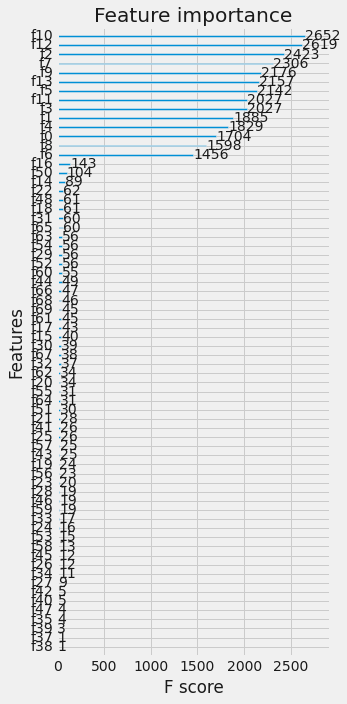

In [31]:
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(5, 10)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.show()


# Step 5: Submit to the competition

We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.

In [32]:
# Use the model to generate predictions
predictions = final_model.predict(X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': X_test.index,
                       'target': predictions})
output.to_csv('submission.csv', index=False)